# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

#### Biblioteca de importação

In [28]:
import pandas as pd

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score 

import numpy as np

import statsmodels.formula.api as smf
%matplotlib inline

#### Carregando base de dados

In [29]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

#### Visualização do modelo sem a transformação da variavél x 

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        10:11:17   Log-Likelihood:                -842.41
No. Observations:                 244   AIC:                             1689.
Df Residuals:                     242   BIC:                             1696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7901      0.782     25.296      0.0

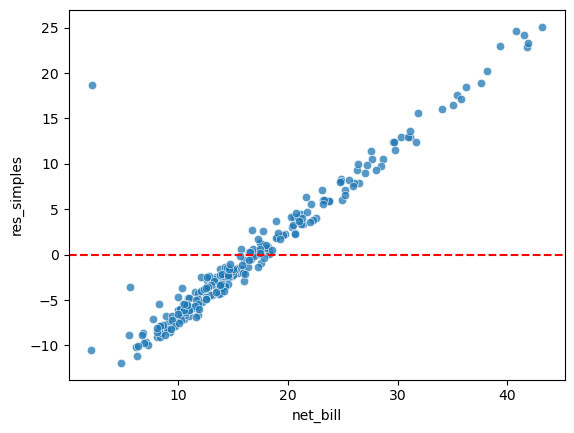

In [30]:
reg_simples = smf.ols('net_bill ~ tip_pct', data = tips).fit()
print(reg_simples.summary())
tips['res_simples'] = reg_simples.resid

sns.scatterplot(x = 'net_bill', y = tips['res_simples'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Ajuste do modelo em função do logaritmo

                            OLS Regression Results                            
Dep. Variable:       np.log(net_bill)   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        10:43:34   Log-Likelihood:                -138.31
No. Observations:                 244   AIC:                             280.6
Df Residuals:                     242   BIC:                             287.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9773      0.044     68.180      0.0

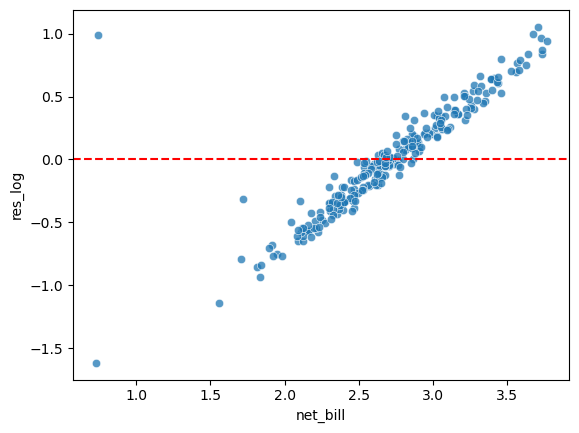

In [41]:
reg_log = smf.ols('np.log(net_bill) ~ tip_pct', data = tips).fit()
print(reg_log.summary())
tips['res_log'] = reg_log.resid

sns.scatterplot(x = np.log(tips['net_bill']), y = tips['res_log'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

#### Ajuste do modelo em função do polinômio

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     31.42
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           7.50e-13
Time:                        10:11:18   Log-Likelihood:                -825.83
No. Observations:                 244   AIC:                             1658.
Df Residuals:                     241   BIC:                             1668.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.8954 

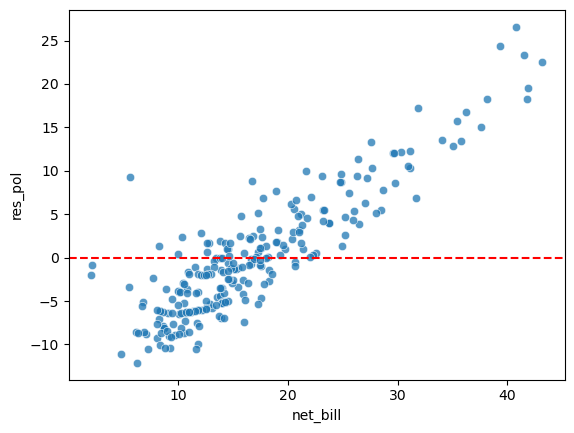

In [32]:
reg_pol = smf.ols('net_bill ~ tip_pct + np.power(tip_pct,2)', data = tips).fit()
print(reg_pol.summary())
tips['res_pol'] = reg_pol.resid

sns.scatterplot(x = 'net_bill', y = tips['res_pol'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        10:11:19   Log-Likelihood:                -821.36
No. Observations:                 244   AIC:                             1647.
Df Residuals:                     242   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2338      1.858     

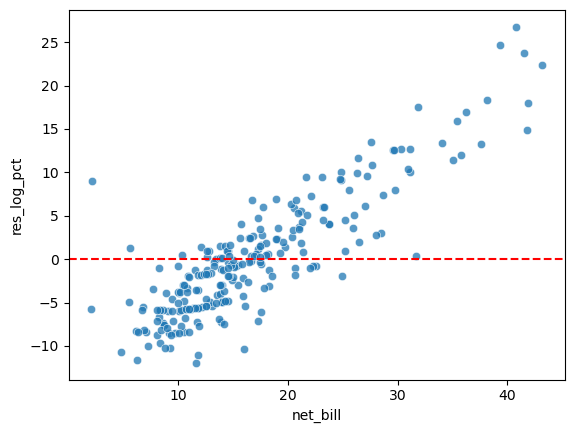

In [33]:
reg_log_pct = smf.ols('net_bill ~ np.log(tip_pct)', data = tips).fit()
print(reg_log_pct.summary())
tips['res_log_pct'] = reg_log_pct.resid

sns.scatterplot(x = 'net_bill', y = tips['res_log_pct'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
# obtendo o R² do modelo ajustado
r2_log_pct = reg_log_pct.rsquared
print(r2_log_pct)

0.23534487140864324


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:       np.log(net_bill)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        10:51:59   Log-Likelihood:                -123.41
No. Observations:                 244   AIC:                             250.8
Df Residuals:                     242   BIC:                             257.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6771      0.106     

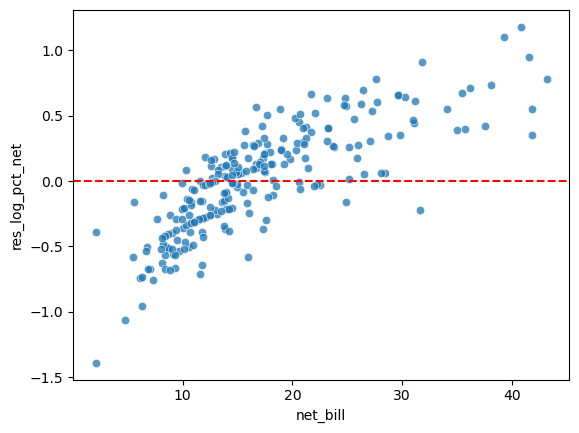

In [44]:
reg_log_pct_net = smf.ols('np.log(net_bill) ~ np.log(tip_pct) ', data = tips).fit()
print(reg_log_pct_net.summary())
tips['res_log_pct_net'] = reg_log_pct_net.resid

sns.scatterplot(x = 'net_bill', y = tips['res_log_pct_net'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [45]:
# obtendo o R² do modelo ajustado
r2_tip_pct_net = reg_log_pct_net.rsquared 
print(r2_tip_pct_net)

0.2934740215080779


###  6. qual modelo resultou no melhor ajuste?

o modelo 5 resultou no R² mais alto, com ajuste em log na variável dependente e na variável resposta.